In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### 1. Dataset

In [30]:
dataset = pd.read_csv("mouse_viral_study.csv")
dataset

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


In [31]:
X = dataset[['Med_1_mL', 'Med_2_mL']].values
y = dataset[['Virus Present']].values

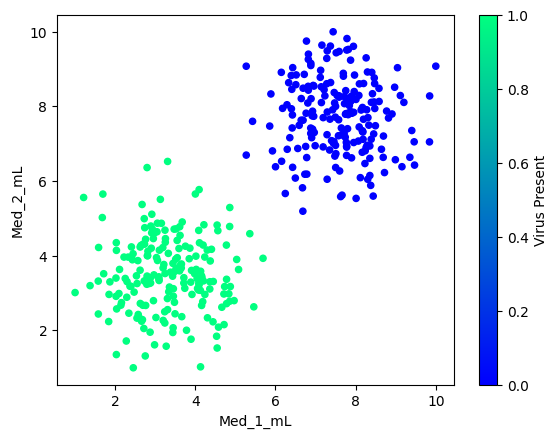

In [32]:
dataset.plot.scatter(x='Med_1_mL',y='Med_2_mL', c='Virus Present', colormap='winter')
plt.show()

### 2. Modèle


In [33]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [34]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [35]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A



W,b=initialisation(X)
modele(X, W, b)

### 3. Fonction Coût 

In [36]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [37]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [38]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [39]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

In [40]:
# split the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 


### 5. Modèle final

In [41]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

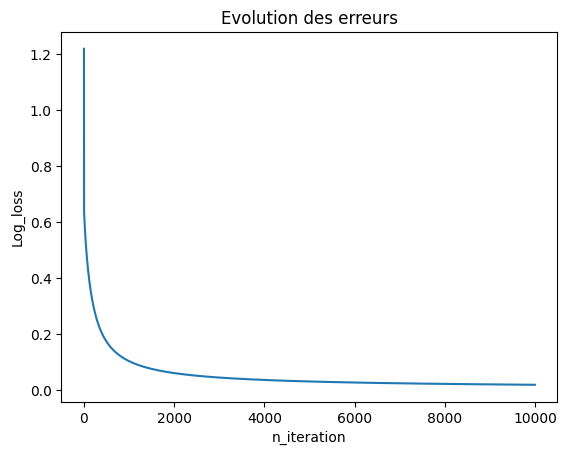

In [42]:
W,b=regression_logistique(X_train, y_train)

### 5. 1 Evaluation du modèle et Visualisation


In [43]:
from sklearn.metrics import accuracy_score
y_pred = predict(X, W, b)
print("Accuracy=",accuracy_score(y, y_pred))

[[5.90009093e-03]
 [9.87584635e-01]
 [7.25961283e-02]
 [9.51429590e-01]
 [9.99829509e-01]
 [9.99458599e-01]
 [2.28356743e-03]
 [3.58816152e-03]
 [3.44166375e-02]
 [9.84575377e-01]
 [9.99315687e-01]
 [9.99073198e-01]
 [9.88098315e-01]
 [9.86925197e-01]
 [9.79881505e-01]
 [7.01687399e-04]
 [1.88287231e-02]
 [8.72016015e-03]
 [1.24911542e-02]
 [9.83069080e-01]
 [1.62695598e-02]
 [9.99507329e-01]
 [2.06480794e-04]
 [1.60780488e-03]
 [5.88937743e-02]
 [5.07738644e-03]
 [8.42502073e-01]
 [9.92840045e-01]
 [9.97722620e-01]
 [1.87811766e-03]
 [1.99418653e-03]
 [3.92202644e-04]
 [1.81411947e-01]
 [6.53672938e-03]
 [9.97777924e-01]
 [2.96955464e-03]
 [9.99554352e-01]
 [9.67503151e-01]
 [9.83396272e-01]
 [9.96126823e-01]
 [1.90550809e-03]
 [7.14501078e-03]
 [9.52034992e-01]
 [3.51756527e-03]
 [1.91336131e-03]
 [9.97339919e-01]
 [9.88136473e-01]
 [9.92525000e-01]
 [8.43189003e-01]
 [9.99350253e-01]
 [1.22075666e-03]
 [9.97031428e-01]
 [3.23127836e-03]
 [1.03218224e-03]
 [8.39456332e-03]
 [1.670332

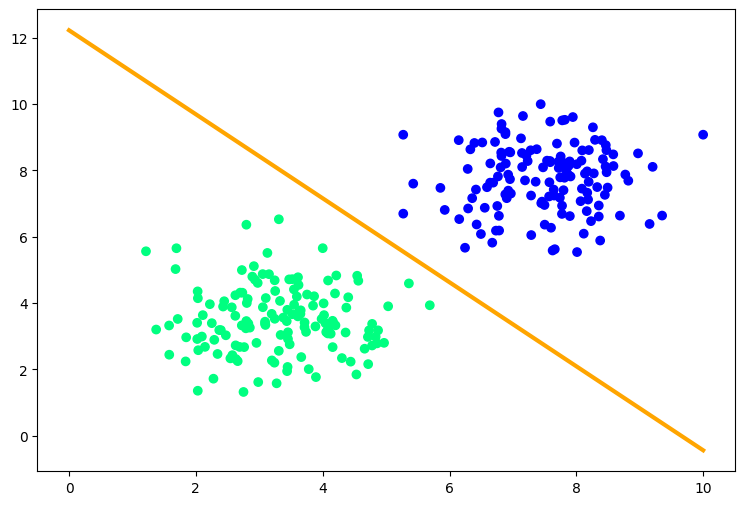

In [44]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 10, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)


plt.show()

## Test

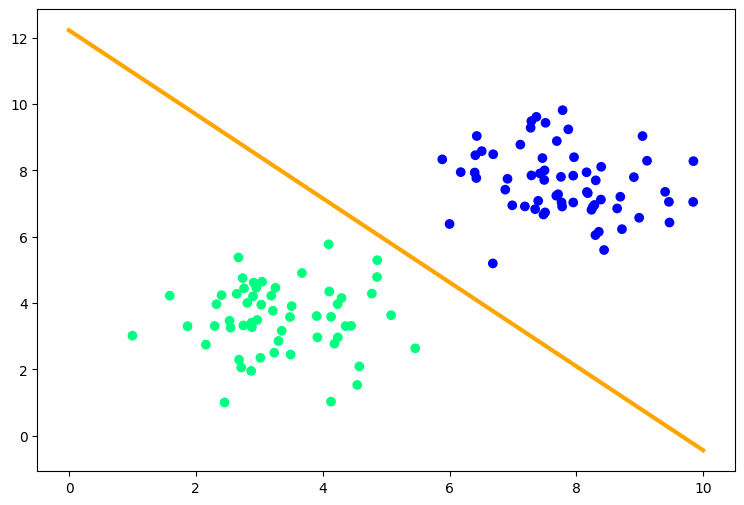

In [45]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_test[:,0], X_test[:, 1], c=y_test, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 10, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)


plt.show()

In [46]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X_train, W, b)
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[9.99315458e-01]
 [9.70258132e-01]
 [8.72016015e-03]
 [4.35969259e-03]
 [5.88937743e-02]
 [9.82066119e-01]
 [1.27439983e-02]
 [9.96520421e-01]
 [2.58481105e-02]
 [7.35872247e-03]
 [9.97065375e-01]
 [2.17933979e-01]
 [9.98833736e-01]
 [1.22288470e-03]
 [9.86527442e-01]
 [9.72994203e-01]
 [9.96475076e-01]
 [6.01595547e-03]
 [9.70513766e-01]
 [7.35149055e-03]
 [9.99554352e-01]
 [9.94542528e-01]
 [1.31001340e-02]
 [9.75054978e-01]
 [9.97849531e-01]
 [1.39869257e-02]
 [9.95939125e-01]
 [9.98233186e-01]
 [9.99350995e-01]
 [1.41095181e-03]
 [2.28356743e-03]
 [1.53380698e-03]
 [1.74419946e-02]
 [9.70038695e-01]
 [9.99315687e-01]
 [2.82477749e-03]
 [9.57814915e-01]
 [9.94926097e-01]
 [9.81800765e-01]
 [9.98939085e-01]
 [2.60578805e-03]
 [1.10687842e-03]
 [9.91344899e-01]
 [5.28350642e-03]
 [2.24437173e-03]
 [9.31484503e-04]
 [9.98845067e-01]
 [9.96070974e-01]
 [8.93135507e-02]
 [9.92875936e-01]
 [9.93369107e-01]
 [7.70574103e-01]
 [9.99745410e-01]
 [2.39710817e-02]
 [9.71421371e-03]
 [9.932719

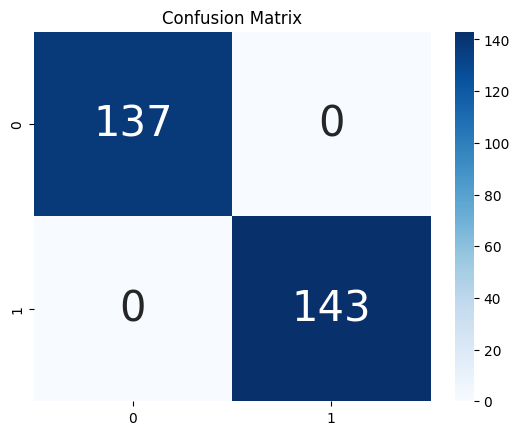

In [47]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()